# Compute roof top heights

## Using the joined polygons

In [1]:
import geopandas as gpd
roofs = gpd.read_file("../data/Vienna/modelling_results/building_3d_2_1.csv")

In [2]:
import geopandas as gpd
from shapely import wkt

def convert_geometry_column(gdf):
    # Convert the 'geometry' column from WKT strings to shapely geometries
    gdf['geometry'] = gdf['geometry'].apply(wkt.loads)
    return gdf

roofs = convert_geometry_column(roofs)

In [3]:
def get_largest_polygon(geometry):
    if geometry.geom_type == 'MultiPolygon':
        return max(geometry.geoms, key=lambda a: a.area)
    return geometry

# Apply the function to convert MultiPolygons to Polygons
roofs['geometry'] = roofs['geometry'].apply(get_largest_polygon)

In [4]:
result = []
for i in range(len(roofs)):
    polygon = roofs['geometry'][i].exterior.coords[0][2]
    points = len(roofs['geometry'][i].exterior.coords)
    min_ = 888788
    max_ = -5000
    for j in range(points):
        height = roofs['geometry'][i].exterior.coords[j][2]
        if height < min_:
            min_ = height
        if height > max_:
            max_ = height
    result.append(max_-min_)

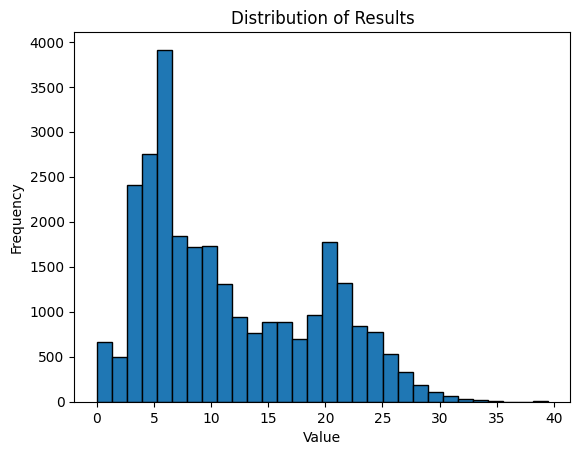

In [5]:
import matplotlib.pyplot as plt

plt.hist(result, bins=30, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Results')
plt.show()


In [6]:
roofs['roof_height'] = result

# Save the updated DataFrame to a new CSV file
roofs.reset_index(drop=True).to_csv("../data/Vienna/modelling_results/building_3d_Roofs_2.csv", index=False)

## Using a randomly selected polygon

In [7]:
import geopandas as gpd
roofs = gpd.read_file("../data/Vienna/modelling_results/building_3d_2.csv")

In [8]:
import geopandas as gpd
from shapely import wkt

def convert_geometry_column(gdf):
    # Convert the 'geometry' column from WKT strings to shapely geometries
    gdf['geometry'] = gdf['geometry'].apply(wkt.loads)
    return gdf

roofs = convert_geometry_column(roofs)

In [9]:
def get_largest_polygon(geometry):
    if geometry.geom_type == 'MultiPolygon':
        return max(geometry.geoms, key=lambda a: a.area)
    return geometry

# Apply the function to convert MultiPolygons to Polygons
roofs['geometry'] = roofs['geometry'].apply(get_largest_polygon)

In [10]:
result = []
for i in range(len(roofs)):
    polygon = roofs['geometry'][i].exterior.coords[0][2]
    points = len(roofs['geometry'][i].exterior.coords)
    min_ = 888788
    max_ = -5000
    for j in range(points):
        height = roofs['geometry'][i].exterior.coords[j][2]
        if height < min_:
            min_ = height
        if height > max_:
            max_ = height
    result.append(max_-min_)

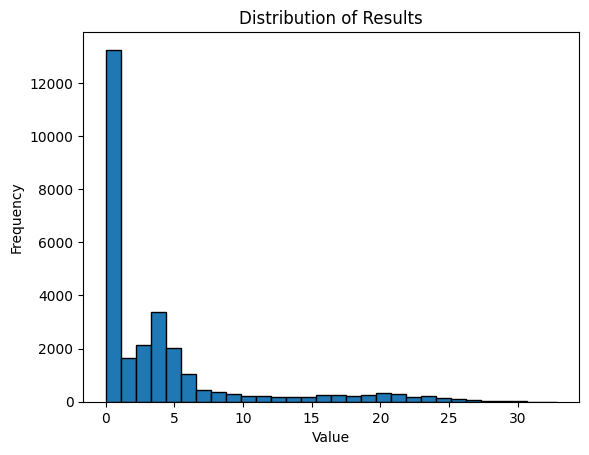

In [11]:
import matplotlib.pyplot as plt

plt.hist(result, bins=30, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Results')
plt.show()

In [12]:
roofs['roof_height'] = result

# Save the updated DataFrame to a new CSV file
roofs.reset_index(drop=True).to_csv("../data/Vienna/modelling_results/building_3d_Roofs.csv", index=False)